In [21]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [22]:
df=web.DataReader('MSFT',data_source="yahoo",start='2014-01-01',end='2020-10-05')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,37.580002,37.220001,37.400002,37.410000,17503500.0,32.432014
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.215286
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,31.998550
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.322340
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.565083
...,...,...,...,...,...,...
2020-09-29,210.070007,206.809998,209.350006,207.259995,24221900.0,207.259995
2020-09-30,211.979996,206.539993,207.729996,210.330002,33780700.0,210.330002
2020-10-01,213.990005,211.320007,213.490005,212.460007,27158400.0,212.460007


In [23]:
df.shape

(1703, 6)

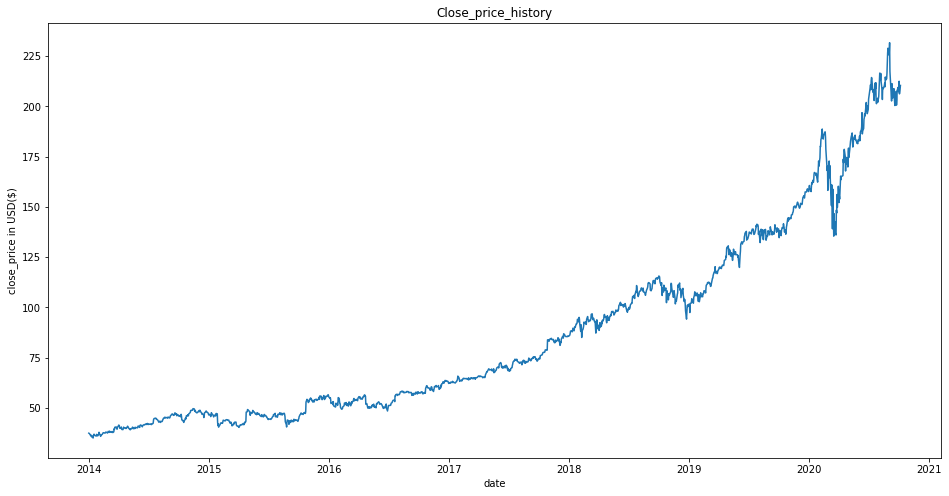

In [24]:
plt.figure(figsize=(16,8))
plt.title("Close_price_history")
plt.plot(df["Close"])
plt.xlabel("date")
plt.ylabel("close_price in USD($)")
plt.show()

In [25]:
#slicing out the 80%data from the close column 
data=df.filter(['Close'])
#getting the numbers of data
dataset=data.values
traning_data=math.ceil( len(dataset)*0.8)
traning_data


1363

In [26]:
#basiclythis step is to scale the data to float and int
scaler=MinMaxScaler()
#min_max_scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(dataset)
#df[["A", "B"]] = min_max_scaler.fit_transform(df[["A", "B"]])
scaled_data

array([[0.01235572],
       [0.01108456],
       [0.00981339],
       ...,
       [0.90242544],
       [0.87054461],
       [0.89184934]])

In [27]:
trained_data=scaled_data[0:traning_data,:]
x_train=[]
y_train=[]

for i in range(60, len(trained_data)):
    x_train.append(trained_data[i-60:i,0])
    y_train.append(trained_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
    


[array([0.01235572, 0.01108456, 0.00981339, 0.00584737, 0.00727106,
       0.00396603, 0.00279656, 0.00538975, 0.        , 0.00406772,
       0.00905069, 0.0097117 , 0.00711853, 0.00605074, 0.00483043,
       0.00549144, 0.00930494, 0.00533889, 0.00655922, 0.00854223,
       0.00955917, 0.01454213, 0.00762699, 0.00696598, 0.00427111,
       0.0061016 , 0.00803377, 0.00925408, 0.0111354 , 0.01266081,
       0.01337266, 0.0134235 , 0.01240656, 0.01286418, 0.01408451,
       0.01525398, 0.01377942, 0.01301674, 0.01266081, 0.01464383,
       0.01693193, 0.01423704, 0.01744038, 0.01591499, 0.01611838,
       0.01484722, 0.01444043, 0.01545737, 0.01672854, 0.01479636,
       0.01383028, 0.0156099 , 0.02323689, 0.02181319, 0.02720294,
       0.02633854, 0.02806732, 0.02725378, 0.02445722, 0.02227082])]
[0.027050388201271175]
[array([0.01235572, 0.01108456, 0.00981339, 0.00584737, 0.00727106,
       0.00396603, 0.00279656, 0.00538975, 0.        , 0.00406772,
       0.00905069, 0.0097117 , 0.00

In [28]:
x_train,y_train=np.array(x_train),np.array(y_train)
#reshape data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1303, 60, 1)

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1303/1303 [==============================] - 47s 36ms/step - loss: 3.9024e-04


In [32]:
test_data=scaled_data[traning_data-60:,:]
x_test=[]
y_test=dataset[traning_data:,:]

for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [33]:
x_test,y_test=np.array(x_test),np.array(y_test)

#reshape data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(340, 60, 1)

In [34]:
#model pridiction
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [35]:
#RMSE
#from sklearn.metrics import mean_squared_error
rmse=np.sqrt(np.mean(prediction-y_test)**2)
print("rmse: {}".format(rmse))


rmse: 11.760923744650448


In [36]:
train=data[:traning_data]
valid=data[traning_data:]
valid['prediction']=prediction

<ipython-input-36-6b022c400902>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


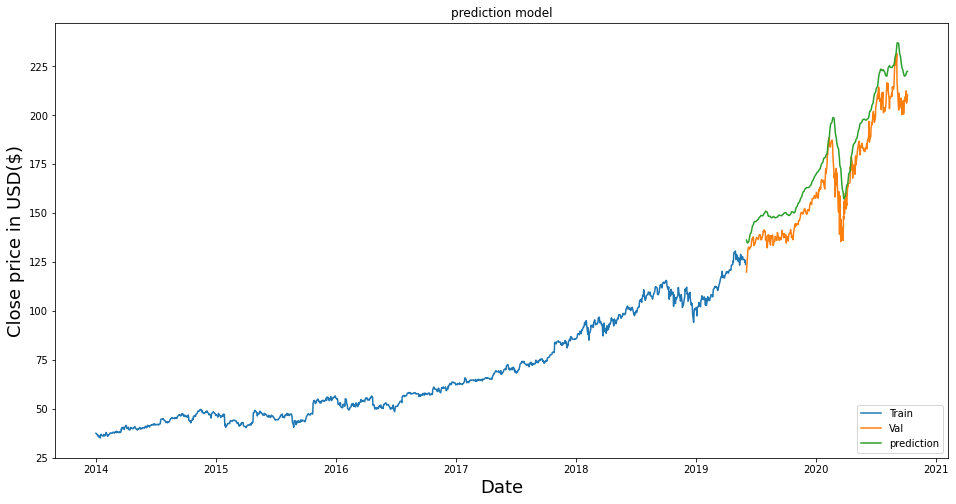

In [37]:

#visualize the data
plt.figure(figsize=(16,8))
plt.title('prediction model')
plt.xlabel('Date',fontsize='18')
plt.ylabel('Close price in USD($)',fontsize='18')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Val','prediction'],loc='lower right')
plt.show()


In [38]:
valid

,Close,prediction
Date,,
2019-06-03,119.839996,136.175262
2019-06-04,123.160004,135.463501
2019-06-05,125.830002,134.895660
2019-06-06,127.820000,134.676071
2019-06-07,131.399994,134.828674
...,...,...
2020-09-29,207.259995,220.423660
2020-09-30,210.330002,220.759766
2020-10-01,212.460007,221.324188


In [39]:
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2015-01-01',end='2020-10-05')
new_df= apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[121.98462]]


In [40]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2020-10-07',end='2020-10-07')
print(apple_quote2["Close"])

Date
2020-10-06    113.160004
2020-10-07    115.080002
Name: Close, dtype: float64
